# In this notebook:

## Creating linearly separable synthetic datasets

## Binary classification methods with 2 features for easy visualisation

- linear classification methods: logistic regression, SVM
- non-linear methods: polynomial SVM, RBF SVM

## Evaluating model performance:
- training/test set split,
- generalisation errors. cross-validation score
- metrics: accuracy, F1 measures, average_precision_score, AUC (using classification reports)

In [1]:
from commonFunctions import *

## generate a " well-behaved", linearly separable dataset

In [2]:
X, CL = makeDataset(kind='classification', n_classes=2, sameScale = True, balanced = True, unbalance = 0.1,
                   n_clusters_per_class=2)


visualise the entire dataset 

<AxesSubplot:>

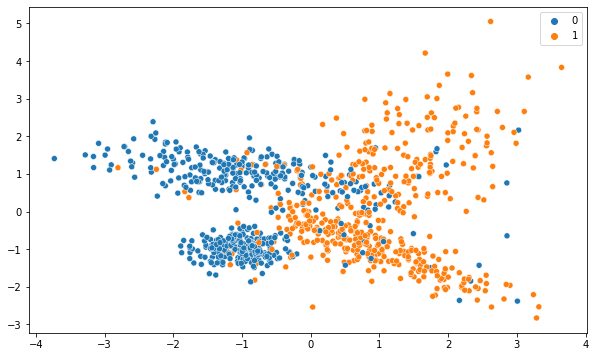

In [3]:
# plot entire X,Y
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=CL)

## split the dataset into train vs test

In [ ]:
XTrain, XTest, CLTrain, CLTest = train_test_split(X, CL, test_size = 0.33, random_state = 10)

## does the training set need scaling?

Use `StandardScaler` to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a [section on the effects of not standardizing your data](
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)

source: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [ ]:
XTrain, XTest  = scale(XTrain, XTest)

In [ ]:
# plot entire X,Y
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=CL)

## Logistic regression

In [ ]:
from sklearn.metrics import confusion_matrix

clf, CL_pred_Train, CL_pred_Test = logit(XTrain, CLTrain, XTest, CLTest)

# plotLinearFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

plotContourFitTrainTestAlternate(clf, XTrain, CLTrain, XTest, CLTest, sharp=True)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotROC(clf, XTest, CLTest)


## SVM (linear)

In [ ]:
clf, CL_pred_Train, CL_pred_Test = LinearSVM(XTrain, CLTrain, XTest, CLTest)

#plotLinearFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

plotContourFitTrainTestAlternate(clf, XTrain, CLTrain, XTest, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

plotROC(clf, XTest, CLTest)

## Decision trees

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(XTrain, CLTrain)

plotContourFitTrainTest(clf, XTrain, CLTrain, XTest, CLTest)

evaluationReport(CLTrain, CL_pred_Train, CLTest, CL_pred_Test)

dot = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot) 
graph